In [4]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('./breastcancer.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
target_y = df.diagnosis.astype('category').cat.codes.tolist()
target_name = list(map(str, target_y))

In [8]:
df_data = df.loc[:, (df.columns != 'id') &  (df.columns != 'diagnosis') & (df.columns != 'Unnamed: 32') ]

In [16]:
X_original = df_data.as_matrix()

X_std = (df_data - df_data.mean()) / df_data.std()
X_std = X_std.as_matrix()

X_norm = (df_data - df_data.min()) / (df_data.max() - df_data.min())
X_norm = X_norm.as_matrix()

KeyboardInterrupt: 

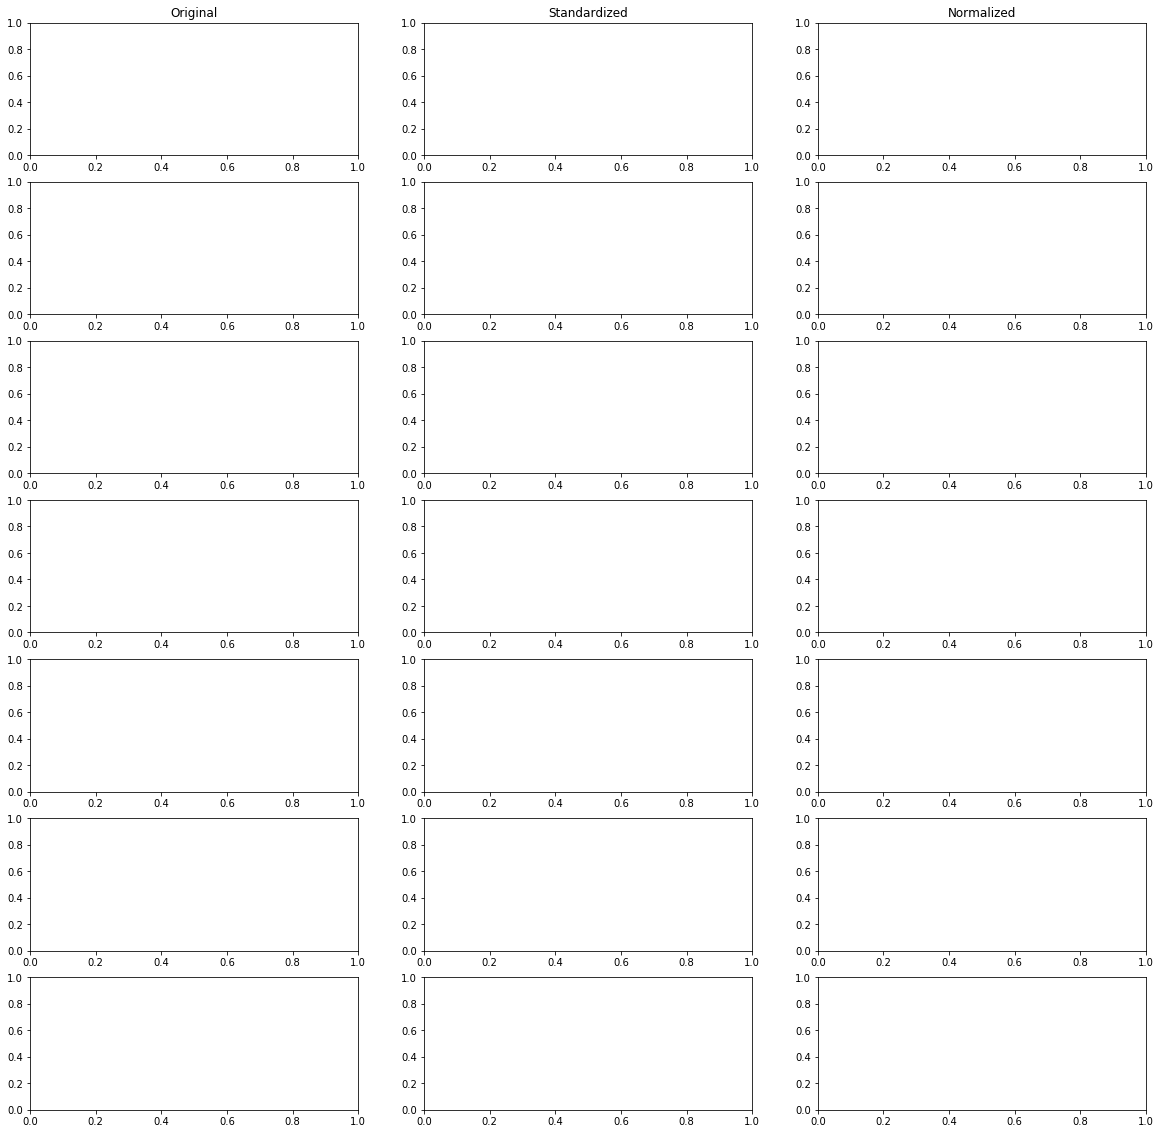

In [10]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(7, 3, figsize=(20,20))
axes[0][0].set_title('Original')
axes[0][1].set_title('Standardized')
axes[0][2].set_title('Normalized')

# perps = [2, 5, 10, 20, 50, 60, 75]
perps = [7, 10, 20, 50, 60, 75]

for i, perp in enumerate(perps):
    tsne = TSNE(perplexity=perp)
    X2d0 = tsne.fit_transform(X_original)
    X2d1 = tsne.fit_transform(X_std)
    X2d2 = tsne.fit_transform(X_norm)
    
    axes[i][0].scatter(X2d0[:,0], X2d0[:,1], c=target_y)
    axes[i][1].scatter(X2d1[:,0], X2d1[:,1], c=target_y)
    axes[i][2].scatter(X2d2[:,0], X2d2[:,1], c=target_y)
    
plt.show()

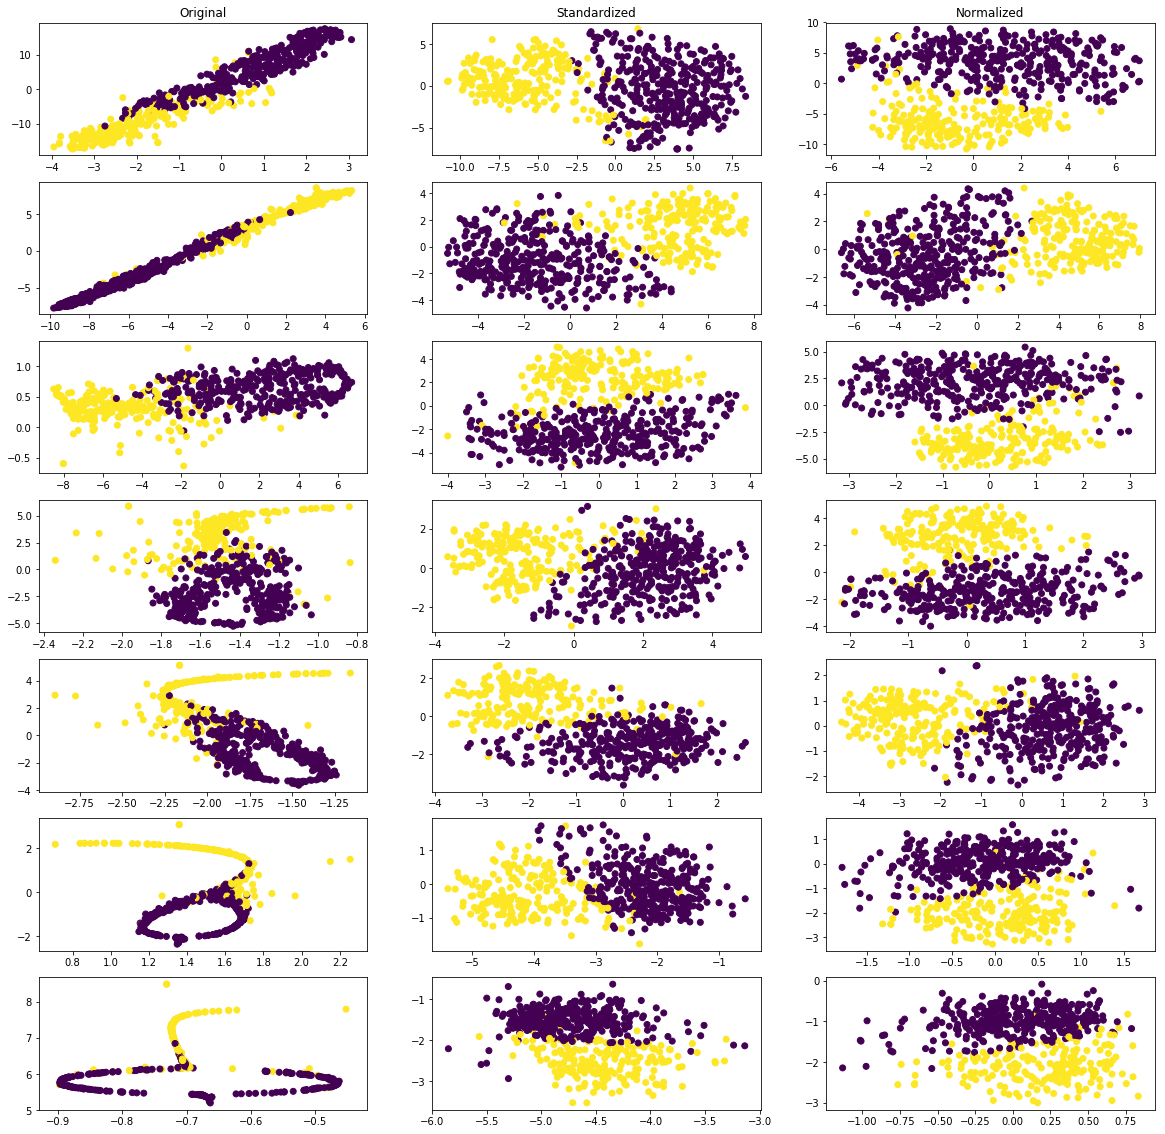

In [35]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(7, 3, figsize=(20,20))
axes[0][0].set_title('Original')
axes[0][1].set_title('Standardized')
axes[0][2].set_title('Normalized')

# perps = [2, 5, 10, 20, 50, 60, 75]
perps = [100, 150, 200, 250, 300, 400, 500]

for i, perp in enumerate(perps):
    tsne = TSNE(perplexity=perp)
    X2d0 = tsne.fit_transform(X_original)
    X2d1 = tsne.fit_transform(X_std)
    X2d2 = tsne.fit_transform(X_norm)
    
    axes[i][0].scatter(X2d0[:,0], X2d0[:,1], c=target_y)
    axes[i][1].scatter(X2d1[:,0], X2d1[:,1], c=target_y)
    axes[i][2].scatter(X2d2[:,0], X2d2[:,1], c=target_y)
    
plt.show()

In [19]:
pickle_data = {
    'data': X_std,
    'y': np.array(target_y),
    'labels': target_name
}

pickle.dump(pickle_data, open('breastCancer.pickle', 'wb'))

In [20]:
def load_pickle(name, limit_size=2000):
    inputName = '{}.pickle'.format(name)
    dataset = pickle.load(open(inputName, 'rb'))
    X, labels = dataset['data'], dataset['labels']
    n = min(limit_size, X.shape[0])
    X = X[:n]
    labels = labels[:n]
    if 'y' in dataset:
        y = dataset['y'][:n]
    else:
        y = np.zeros(n)
    print("Data from pickle: ", X.shape, y.shape, len(labels))
    return X, y, labels

# test load pickle file
load_pickle('breastCancer')

Data from pickle:  (569, 30) (569,) 569


(array([[ 1.09609953, -2.0715123 ,  1.26881726, ...,  2.2940576 ,
          2.74820411,  1.93531174],
        [ 1.82821197, -0.35332152,  1.68447255, ...,  1.08612862,
         -0.24367526,  0.28094279],
        [ 1.5784992 ,  0.45578591,  1.56512598, ...,  1.95328166,
          1.15124203,  0.20121416],
        ..., 
        [ 0.70166686,  2.04377549,  0.67208442, ...,  0.41370467,
         -1.10357792, -0.31812924],
        [ 1.83672491,  2.33440316,  1.98078127, ...,  2.28797231,
          1.9173959 ,  2.21768395],
        [-1.80681144,  1.22071793, -1.81279344, ..., -1.7435287 ,
         -0.04809589, -0.75054629]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,